# Introduction to Web scraping

In [1]:
import requests
from bs4 import BeautifulSoup

#The library requests allows us to web scrape content
#BeautifulSoup parses html and makes navigating it much easier
r = requests.get("https://en.wikipedia.org/wiki/S%26P_100")
soup = BeautifulSoup(r.content, 'html.parser')

In [2]:
#The prettify function allows for easier viewing of the data
print(soup.prettify())

<!DOCTYPE html>
<html class="client-nojs" dir="ltr" lang="en">
 <head>
  <meta charset="utf-8"/>
  <title>
   S&amp;P 100 - Wikipedia
  </title>
  <script>
   document.documentElement.className="client-js";RLCONF={"wgBreakFrames":false,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"92387139-3b24-474f-bf0a-bf8e2a252245","wgCSPNonce":false,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":false,"wgNamespaceNumber":0,"wgPageName":"S\u0026P_100","wgTitle":"S\u0026P 100","wgCurRevisionId":1092242052,"wgRevisionId":1092242052,"wgArticleId":2658424,"wgIsArticle":true,"wgIsRedirect":false,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Pages with non-numeric formatnum arguments","Articles with short description","Short description matches Wikidata","1983 introductions","Am

In [3]:
#We can look for a certain element using find
#It will return the first one
title = soup.find('title')
print(title)

<title>S&amp;P 100 - Wikipedia</title>


In [4]:
#The find_all function finds all applicable elements
tables = soup.find_all('table')
print(len(tables))
print()
print()
print(tables[0].prettify())

4


<table class="infobox vcard">
 <caption class="infobox-title fn n org">
  S&amp;P 100
 </caption>
 <tbody>
  <tr>
   <th class="infobox-label" scope="row">
    Foundation
   </th>
   <td class="infobox-data">
    June 15, 1983
    <span class="noprint">
     ; 39 years ago
    </span>
    <span style="display:none">
     (
     <span class="bday dtstart published updated">
      1983-06-15
     </span>
     )
    </span>
    <sup class="reference" id="cite_ref-S&amp;P500_1-0">
     <a href="#cite_note-S&amp;P500-1">
      [1]
     </a>
    </sup>
   </td>
  </tr>
  <tr>
   <th class="infobox-label" scope="row">
    Operator
   </th>
   <td class="infobox-data">
    <a href="/wiki/S%26P_Dow_Jones_Indices" title="S&amp;P Dow Jones Indices">
     S&amp;P Dow Jones Indices
    </a>
    <sup class="reference" id="cite_ref-S&amp;P500Details_2-0">
     <a href="#cite_note-S&amp;P500Details-2">
      [2]
     </a>
    </sup>
   </td>
  </tr>
  <tr>
   <th class="infobox-label" scope="row">

In [5]:
#We can also search by class in addition to element
#For example, let's get only sortable tables
sortable_tables = soup.findAll("table", {"class": "sortable"})
print(len(sortable_tables))
print()
print()
print(sortable_tables[0].prettify())

2


<table class="wikitable sortable" id="constituents">
 <tbody>
  <tr>
   <th>
    Symbol
   </th>
   <th>
    Name
   </th>
   <th>
    Sector
   </th>
  </tr>
  <tr>
   <td>
    AAPL
   </td>
   <td>
    <a href="/wiki/Apple_Inc." title="Apple Inc.">
     Apple
    </a>
   </td>
   <td>
    Information Technology
   </td>
  </tr>
  <tr>
   <td>
    ABBV
   </td>
   <td>
    <a href="/wiki/AbbVie" title="AbbVie">
     AbbVie
    </a>
   </td>
   <td>
    Health Care
   </td>
  </tr>
  <tr>
   <td>
    ABT
   </td>
   <td>
    <a href="/wiki/Abbott_Laboratories" title="Abbott Laboratories">
     Abbott
    </a>
   </td>
   <td>
    Health Care
   </td>
  </tr>
  <tr>
   <td>
    ACN
   </td>
   <td>
    <a href="/wiki/Accenture" title="Accenture">
     Accenture
    </a>
   </td>
   <td>
    Information Technology
   </td>
  </tr>
  <tr>
   <td>
    ADBE
   </td>
   <td>
    <a href="/wiki/Adobe_Inc." title="Adobe Inc.">
     Adobe
    </a>
   </td>
   <td>
    Information Technology

In [6]:
#We can see certain attributes of an element easily
example_table = sortable_tables[0]
#For example, the class(es) through attrs
print(example_table.attrs)
print()
print(example_table.attrs["class"])

{'class': ['wikitable', 'sortable'], 'id': 'constituents'}

['wikitable', 'sortable']


In [7]:
#Or just the text through the text attribute
print(example_table.text)



Symbol

Name

Sector


AAPL

Apple

Information Technology


ABBV

AbbVie

Health Care


ABT

Abbott

Health Care


ACN

Accenture

Information Technology


ADBE

Adobe

Information Technology


AIG

AIG

Financials


AMGN

Amgen

Health Care


AMT

American Tower

Real Estate


AMZN

Amazon

Consumer Discretionary


AVGO

Broadcom

Information Technology


AXP

American Express

Financials


BA

Boeing

Industrials


BAC

Bank of America

Financials


BK

BNY Mellon

Financials


BKNG

Booking Holdings

Consumer Discretionary


BLK

BlackRock

Financials


BMY

Bristol Myers Squibb

Health Care


BRK.B

Berkshire Hathaway

Financials


C

Citigroup

Financials


CAT

Caterpillar

Industrials


CHTR

Charter Communications

Communication Services


CL

Colgate-Palmolive

Consumer Staples


CMCSA

Comcast

Communication Services


COF

Capital One

Financials


COP

ConocoPhillips

Energy


COST

Costco

Consumer Staples


CRM

Salesforce

Information Technology


CSCO

Cisco

Informa

In [13]:
#Let's see if there is an easy way to identify which table is the list of the S&P 100 by class
sortable_table_classes = [table.attrs["class"] for table in sortable_tables]
for class_list in sortable_table_classes:
    print(class_list)
#They are the same, we will need to do something else

['wikitable', 'sortable']
['wikitable', 'sortable']


In [14]:
#Let's say we are certain the word Apple Inc. will only be in the table
apple_text_elements = soup.findAll(text='Apple Inc.')
print(apple_text_elements)
assert len(apple_text_elements) == 1
print()
print("Only one element with the text Apple Inc.")

[]


AssertionError: 

In [15]:
#It might look like a string, but if you look at the type you will see it is not
print(type(apple_text_elements[0]))

IndexError: list index out of range

In [18]:
apple_element = apple_text_elements[0]
#The parent attribute gives you the element which contains the current element
print(apple_element.parent)

IndexError: list index out of range

In [19]:
#Getting the parent of the hyperlink, we are now in the <td> tag
print(apple_element.parent.parent)

NameError: name 'apple_element' is not defined

In [20]:
#Then the row
print(apple_element.parent.parent.parent)

NameError: name 'apple_element' is not defined

In [21]:
#Then finally the body of the table
print(apple_element.parent.parent.parent.parent)

NameError: name 'apple_element' is not defined

In [22]:
#You can also query for a certain parent with a tag like below
print(apple_element.find_parent('tbody'))

NameError: name 'apple_element' is not defined

In [23]:
#With this table, we can find all rows first
table = apple_element.find_parent('tbody')
table_rows = table.find_all("tr")
print(len(table_rows))
print()
print(table_rows[0])
print()
print(table_rows[1])

NameError: name 'apple_element' is not defined

In [24]:
#We could iterate through each row and grab the second element
#But it is just as clean to go straight for hyperlinks by selecting only the a elements
links = table.find_all('a')
print(len(links))
print(links[0])

NameError: name 'table' is not defined

In [25]:
#The attributes of each link holds the linked page
example_link = links[0]
print(example_link.attrs)
print()
print(example_link.attrs["href"])

NameError: name 'links' is not defined

In [26]:
#Let's convert the links list to be the actual links
links = [link.attrs["href"] for link in links]
print(links)

NameError: name 'links' is not defined

In [20]:
#Because of the potential for there to be two share classes, we should check duplicates
#np.unique() returns two objects when return_counts = True, the unique values and the counts for them
import numpy as np
links_unique, link_counts = np.unique(links, return_counts=True)
print(links_unique)
print(link_counts)

['/wiki/3M' '/wiki/AT%26T' '/wiki/AbbVie_Inc.' '/wiki/Abbott_Laboratories'
 '/wiki/Accenture' '/wiki/Adobe_Inc.' '/wiki/Allergan' '/wiki/Allstate'
 '/wiki/Alphabet_Inc.' '/wiki/Altria' '/wiki/Amazon.com'
 '/wiki/American_Express' '/wiki/American_International_Group'
 '/wiki/Amgen' '/wiki/Apple_Inc.' '/wiki/Bank_of_America'
 '/wiki/Berkshire_Hathaway' '/wiki/Biogen' '/wiki/BlackRock' '/wiki/Boeing'
 '/wiki/Booking_Holdings' '/wiki/Bristol-Myers_Squibb' '/wiki/CVS_Health'
 '/wiki/Capital_One' '/wiki/Caterpillar_Inc.' '/wiki/Celgene'
 '/wiki/Charter_Communications' '/wiki/Chevron_Corporation'
 '/wiki/Cisco_Systems' '/wiki/Citigroup' '/wiki/Colgate-Palmolive'
 '/wiki/Comcast' '/wiki/ConocoPhillips' '/wiki/Costco_Wholesale_Corp.'
 '/wiki/Danaher_Corporation' '/wiki/DowDuPont' '/wiki/Dow_Inc.'
 '/wiki/Duke_Energy' '/wiki/Eli_Lilly_and_Company' '/wiki/Emerson_Electric'
 '/wiki/Exelon' '/wiki/ExxonMobil' '/wiki/Facebook' '/wiki/FedEx'
 '/wiki/Ford_Motor_Company' '/wiki/General_Dynamics'
 '/wik

In [21]:
#We can turn the counts array into True/False based on being greated than 1....
i = link_counts > 1
print(i)

[False False False False False False False False  True False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False]


In [22]:
#And then index the unique links to see which links are duplicated
print(links_unique[i])
#Google and Fox have two share classes

['/wiki/Alphabet_Inc.']


In [23]:
#Let's add in the part of the link that comes before each of these
links_unique = ["https://en.wikipedia.org/" + link for link in links_unique]
print(links_unique)

['https://en.wikipedia.org//wiki/3M', 'https://en.wikipedia.org//wiki/AT%26T', 'https://en.wikipedia.org//wiki/AbbVie_Inc.', 'https://en.wikipedia.org//wiki/Abbott_Laboratories', 'https://en.wikipedia.org//wiki/Accenture', 'https://en.wikipedia.org//wiki/Adobe_Inc.', 'https://en.wikipedia.org//wiki/Allergan', 'https://en.wikipedia.org//wiki/Allstate', 'https://en.wikipedia.org//wiki/Alphabet_Inc.', 'https://en.wikipedia.org//wiki/Altria', 'https://en.wikipedia.org//wiki/Amazon.com', 'https://en.wikipedia.org//wiki/American_Express', 'https://en.wikipedia.org//wiki/American_International_Group', 'https://en.wikipedia.org//wiki/Amgen', 'https://en.wikipedia.org//wiki/Apple_Inc.', 'https://en.wikipedia.org//wiki/Bank_of_America', 'https://en.wikipedia.org//wiki/Berkshire_Hathaway', 'https://en.wikipedia.org//wiki/Biogen', 'https://en.wikipedia.org//wiki/BlackRock', 'https://en.wikipedia.org//wiki/Boeing', 'https://en.wikipedia.org//wiki/Booking_Holdings', 'https://en.wikipedia.org//wiki/B

In [24]:
#Now that we have unique links, we can move on to pulling text from each page for our comparison of text context
#For example, let's grab the first page
r = requests.get(links_unique[0])
soup = BeautifulSoup(r.content, 'html.parser')
print(soup.prettify())

<!DOCTYPE html>
<html class="client-nojs" dir="ltr" lang="en">
 <head>
  <meta charset="utf-8"/>
  <title>
   3M - Wikipedia
  </title>
  <script>
   document.documentElement.className=document.documentElement.className.replace(/(^|\s)client-nojs(\s|$)/,"$1client-js$2");RLCONF={"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"3M","wgTitle":"3M","wgCurRevisionId":898732521,"wgRevisionId":898732521,"wgArticleId":7664801,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Webarchive template wayback links","Use mdy dates from March 2012","Articles with a promotional tone from July 2018","All articles with a promotional tone","Articles that may contain original research from August 2017","All articles that may contain original research","Articles needing additional references from May 2009","All articles needing additional references","All articles with unsourced statements","Articles with

In [25]:
#Let's grab all text data which is in the paragraphs of the page
paragraphs = soup.find_all("p")
paragraphs = [paragraph.text for paragraph in paragraphs]
#Notice the first paragraph is blank
print(paragraphs[0])
print(paragraphs[1])



The 3M Company, formerly known as the Minnesota Mining and Manufacturing Company, is an American multinational conglomerate corporation operating in the fields of industry, worker safety, health care, and consumer goods.[3] The company produces a variety of products, including adhesives, abrasives, laminates, passive fire protection, personal protective equipment, window films, paint protection films, dental and orthodontic products, electrical & electronic connecting and insulating materials, medical products, car-care products,[4] electronic circuits, healthcare software and optical films.[5] It is based in Maplewood, Minnesota, a suburb of St. Paul.[6]



In [26]:
#We can join all paragraph elements with a delimiter between them like so:
print("-".join(["Text 1", "Text 2"]))

Text 1-Text 2


In [27]:
#Let's do this with all the paragraph data but use a space to separate
paragraphs = " ".join(paragraphs)
print(paragraphs)


 The 3M Company, formerly known as the Minnesota Mining and Manufacturing Company, is an American multinational conglomerate corporation operating in the fields of industry, worker safety, health care, and consumer goods.[3] The company produces a variety of products, including adhesives, abrasives, laminates, passive fire protection, personal protective equipment, window films, paint protection films, dental and orthodontic products, electrical & electronic connecting and insulating materials, medical products, car-care products,[4] electronic circuits, healthcare software and optical films.[5] It is based in Maplewood, Minnesota, a suburb of St. Paul.[6]
 In 2017, 3M made $31.7 billion in total sales,[3] and the company ranked No. 97 in the 2018 Fortune 500 list of the largest United States corporations by total revenue.[7] The company has 91,000 employees[8] and has operations in more than 70 countries.[3]
 Five businessmen founded 3M in Two Harbors, Minnesota, in 1902.[9] Original

# Applied Text Data Processing

In [28]:
#Those numbers with brackets (annotations) are annoying, time to get rid of them
#A quick intro to regular expressions
import re
test_string = """This is our test string to find out how regular expressions work. [1]
We will be seeing what kinds of basic searches and functionality we can do. [2]
Case sensitivity may matter in ouR analysis. [33]"""

In [29]:
#Find all will return all matching strings
#In this case we will get back just the exact string because it is what we are looking for
print(re.findall("ou", test_string))

['ou', 'ou', 'ou']


In [30]:
#By using [a-z], we signal the next piece can be any lower case letter a-z
print(re.findall("ou[a-z]", test_string))

['our', 'out']


In [31]:
#Or using [a-r] we limit to letters a through r
print(re.findall("ou[a-r]", test_string))

['our']


In [32]:
#It is case sensitive, so we will see that A-Z gives us capitals
print(re.findall("ou[a-zA-Z]", test_string))

['our', 'out', 'ouR']


In [33]:
#The split function splits text by the searched text
print(re.split("ou[a-zA-Z]", test_string))

['This is ', ' test string to find ', ' how regular expressions work. [1]\nWe will be seeing what kinds of basic searches and functionality we can do. [2]\nCase sensitivity may matter in ', ' analysis. [33]']


In [34]:
#Sub replaces our text where we give a pattern followed by the replacement text followed by the string we are searching
print(re.sub("ou[a-zA-Z]", "[REDACTED]",test_string))

This is [REDACTED] test string to find [REDACTED] how regular expressions work. [1]
We will be seeing what kinds of basic searches and functionality we can do. [2]
Case sensitivity may matter in [REDACTED] analysis. [33]


In [35]:
#Searching for numbers is done like so
#Notice the 33 was split
print(re.findall("[1-9]",test_string))

['1', '2', '3', '3']


In [36]:
#Replacing he numbers
print(re.sub("[1-9]","X",test_string))

This is our test string to find out how regular expressions work. [X]
We will be seeing what kinds of basic searches and functionality we can do. [X]
Case sensitivity may matter in ouR analysis. [XX]


In [37]:
#Adding + after the brackets will say pick wherever there is that occurence one or more times
print(re.findall("[1-9]+",test_string))

['1', '2', '33']


In [38]:
#To find brackets in text, we have to use \[ and \]
print(re.findall("\[",test_string))
print(re.findall("\]",test_string))

['[', '[', '[']
[']', ']', ']']


In [39]:
#Finally, we can add the three together to find occurences where there are brackets with numbers inside
print(re.findall("\[[1-9]+\]",test_string))

['[1]', '[2]', '[33]']


In [40]:
print(re.sub("\[[1-9]+\]","",test_string))

This is our test string to find out how regular expressions work. 
We will be seeing what kinds of basic searches and functionality we can do. 
Case sensitivity may matter in ouR analysis. 


In [41]:
#Test with the actual data
print(paragraphs[:400])
print()
print(re.sub("\[[1-9]+\]","",paragraphs[:400]))


 The 3M Company, formerly known as the Minnesota Mining and Manufacturing Company, is an American multinational conglomerate corporation operating in the fields of industry, worker safety, health care, and consumer goods.[3] The company produces a variety of products, including adhesives, abrasives, laminates, passive fire protection, personal protective equipment, window films, paint protection 


 The 3M Company, formerly known as the Minnesota Mining and Manufacturing Company, is an American multinational conglomerate corporation operating in the fields of industry, worker safety, health care, and consumer goods. The company produces a variety of products, including adhesives, abrasives, laminates, passive fire protection, personal protective equipment, window films, paint protection 


In [42]:
paragraphs = re.sub("\[[1-9]+\]","",paragraphs)

In [43]:
import nltk
#nltk is the library we will use for text analysis
stemmer = nltk.stem.SnowballStemmer('english')

In [44]:
#The stemmer breaks down words into roots
stemmer.stem("run running")

'run run'

In [45]:
paragraphs = stemmer.stem(paragraphs)

In [46]:
#To get counts, we can use the count vectorizer
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()

test_text = "Text that we want to analyze with text analysis."
test_text = stemmer.stem(test_text)
print(test_text)
print()
#The text is not readable from the initial fit_transform because it is in sparse matrix form
counts = vectorizer.fit_transform([test_text])
print(counts)

text that we want to analyze with text analysis.

  (0, 0)	1
  (0, 7)	1
  (0, 1)	1
  (0, 4)	1
  (0, 5)	1
  (0, 6)	1
  (0, 3)	1
  (0, 2)	2


In [47]:
#To array gives us the counts but not the words
print(counts.toarray())

[[1 1 2 1 1 1 1 1]]


In [48]:
#The function get_feature_names returns the names
print(vectorizer.get_feature_names())

['analysis', 'analyze', 'text', 'that', 'to', 'want', 'we', 'with']


In [49]:
import pandas as pd
#Convert the array to a series
print(pd.Series(counts.toarray()[0], index = vectorizer.get_feature_names()))

analysis    1
analyze     1
text        2
that        1
to          1
want        1
we          1
with        1
dtype: int64


In [50]:
#Stop words gets rid of the common words like a or the in the anglish language that don't add much to analysis
vectorizer = CountVectorizer(stop_words='english')
test_text = "Text that we want to analyze with text analysis."
test_text = stemmer.stem(test_text)
counts = vectorizer.fit_transform([test_text])
print(pd.Series(counts.toarray()[0], index = vectorizer.get_feature_names()))

analysis    1
analyze     1
text        2
want        1
dtype: int64


In [51]:
#Let's turn this into a function
def get_company_text(url):
    r = requests.get(url)
    soup = BeautifulSoup(r.content, 'html.parser')
    paragraphs = soup.find_all("p")
    paragraphs = [paragraph.text for paragraph in paragraphs]
    paragraphs = " ".join(paragraphs)
    pattern = "\[[0-9]+\]"
    paragraphs = re.sub(pattern, "", paragraphs)
    stemmer = nltk.stem.SnowballStemmer('english')
    paragraphs = stemmer.stem(paragraphs)
    vectorizer = CountVectorizer(stop_words='english')
    counts = vectorizer.fit_transform([paragraphs])
    counts = pd.Series(counts.toarray()[0],index=vectorizer.get_feature_names())
    return counts
counts = get_company_text(links_unique[0])
print(counts.sort_values(ascending=False))

3m               62
company          30
billion          11
business         11
products         11
minnesota        10
million          10
sales             9
announced         9
2018              7
manufacturing     7
year              7
division          6
product           6
audio             6
sold              6
digital           6
selling           5
international     5
mining            5
united            5
employees         5
video             5
began             5
development       5
production        5
states            5
20                4
2010              4
2017              4
                 ..
m2                1
marketed          1
lucius            1
loss              1
looked            1
long              1
load              1
like              1
licenses          1
market            1
marketing         1
multiple          1
minneapolis       1
multinational     1
moving            1
moves             1
montrose          1
model             1
mixers            1


In [52]:
#And extend to multiple companies
def get_company_text_multiple(urls):
    text = []
    for url in urls:
        r = requests.get(url)
        soup = BeautifulSoup(r.content, 'html.parser')
        paragraphs = soup.find_all("p")
        paragraphs = [paragraph.text for paragraph in paragraphs]
        paragraphs = " ".join(paragraphs)
        pattern = "\[[0-9]+\]"
        paragraphs = re.sub(pattern, "", paragraphs)
        stemmer = nltk.stem.SnowballStemmer('english')
        paragraphs = stemmer.stem(paragraphs)
        text.append(paragraphs)
    vectorizer = CountVectorizer(stop_words='english')
    counts = vectorizer.fit_transform(text)
    counts = pd.DataFrame(counts.toarray(),columns=vectorizer.get_feature_names()).transpose()
    return counts
counts = get_company_text_multiple(links_unique[0:2])
print(counts)

            0  1
000         4  5
10          0  2
100         0  2
107         1  0
108         0  1
109         1  0
11          0  1
113th       0  1
114         0  1
12          1  5
125         1  0
13          2  1
130         0  1
132         1  0
14          0  1
147         1  0
15          0  2
150         1  0
16          1  1
18          0  2
1880        0  1
1885        0  3
1899        0  1
19          1  1
1902        2  0
1905        1  0
1907        1  0
1909        1  0
1910        1  0
1914        1  0
...        .. ..
wells       1  0
went        1  2
west        0  2
wheels      2  0
whitacre    0  2
white       0  1
wholly      0  3
william     1  0
win         0  1
window      1  0
winterthur  1  0
wire        0  1
wired       0  1
wireless    0  6
wireline    0  2
wisconsin   0  1
word        1  0
wording     0  1
work        1  1
worker      1  0
workers     1  0
working     0  1
world       1  5
worldwide   3  0
worth       0  2
worthless   1  0
xandr       0 

In [53]:
#Let's find the index
index = [x[31:] for x in links_unique]
print(index)

['3M', 'AT%26T', 'AbbVie_Inc.', 'Abbott_Laboratories', 'Accenture', 'Adobe_Inc.', 'Allergan', 'Allstate', 'Alphabet_Inc.', 'Altria', 'Amazon.com', 'American_Express', 'American_International_Group', 'Amgen', 'Apple_Inc.', 'Bank_of_America', 'Berkshire_Hathaway', 'Biogen', 'BlackRock', 'Boeing', 'Booking_Holdings', 'Bristol-Myers_Squibb', 'CVS_Health', 'Capital_One', 'Caterpillar_Inc.', 'Celgene', 'Charter_Communications', 'Chevron_Corporation', 'Cisco_Systems', 'Citigroup', 'Colgate-Palmolive', 'Comcast', 'ConocoPhillips', 'Costco_Wholesale_Corp.', 'Danaher_Corporation', 'DowDuPont', 'Dow_Inc.', 'Duke_Energy', 'Eli_Lilly_and_Company', 'Emerson_Electric', 'Exelon', 'ExxonMobil', 'Facebook', 'FedEx', 'Ford_Motor_Company', 'General_Dynamics', 'General_Electric', 'General_Motors', 'Gilead_Sciences', 'Goldman_Sachs', 'Home_Depot', 'Honeywell', 'IBM', 'Intel', 'JPMorgan_Chase_%26_Co.', 'Johnson_%26_Johnson', 'Kinder_Morgan', 'Kraft_Heinz', 'Lockheed_Martin', 'Lowe%27s', 'MasterCard', 'McDona

In [54]:
def get_company_text_multiple(urls):
    text = []
    for url in urls:
        r = requests.get(url)
        soup = BeautifulSoup(r.content, 'html.parser')
        paragraphs = soup.find_all("p")
        paragraphs = [paragraph.text for paragraph in paragraphs]
        paragraphs = " ".join(paragraphs)
        pattern = "\[[0-9]+\]"
        paragraphs = re.sub(pattern, "", paragraphs)
        stemmer = nltk.stem.SnowballStemmer('english')
        paragraphs = stemmer.stem(paragraphs)
        text.append(paragraphs)
    vectorizer = CountVectorizer(stop_words='english')
    counts = vectorizer.fit_transform(text)
    counts = pd.DataFrame(counts.toarray(),columns=vectorizer.get_feature_names()).transpose()
    return counts
counts = get_company_text_multiple(links_unique)
counts.columns = index
print(counts)

              3M  AT%26T  AbbVie_Inc.  Abbott_Laboratories  Accenture  \
00             0       0            0                    0          0   
000            4       5            1                    1          5   
000005         0       0            0                    0          0   
000791         0       0            0                    0          0   
000th          0       0            0                    0          0   
001            0       0            0                    0          0   
002            0       0            0                    0          0   
003            0       0            0                    0          0   
005            0       0            0                    0          0   
006            0       0            0                    0          0   
007            0       0            0                    0          0   
0090           0       0            0                    0          0   
01             0       0            0              

In [55]:
#Save down the data for future use
counts.to_csv("Company Words.csv")

In [56]:
#Find the most common words
print(counts.sum(axis=1).sort_values(ascending=False).head(100))

company          3583
million          1336
new              1301
billion          1279
announced        1040
bank              925
united            826
states            813
business          736
000               690
products          680
apple             671
2018              658
largest           642
year              625
american          582
corporation       574
including         573
acquired          562
market            539
2017              535
companies         530
based             519
2016              502
2015              493
world             485
stores            478
time              469
2010              468
2014              466
                 ... 
august            330
starbucks         329
netflix           328
stock             326
international     325
2006              324
energy            322
store             318
disney            316
general           313
november          312
card              310
government        309
division          308
february  

In [57]:
#Convert to frequency
word_frequency = counts.copy()
word_frequency = word_frequency / word_frequency.sum()
print(word_frequency)

                    3M    AT%26T  AbbVie_Inc.  Abbott_Laboratories  Accenture  \
00            0.000000  0.000000     0.000000             0.000000   0.000000   
000           0.002965  0.002255     0.002119             0.000693   0.006859   
000005        0.000000  0.000000     0.000000             0.000000   0.000000   
000791        0.000000  0.000000     0.000000             0.000000   0.000000   
000th         0.000000  0.000000     0.000000             0.000000   0.000000   
001           0.000000  0.000000     0.000000             0.000000   0.000000   
002           0.000000  0.000000     0.000000             0.000000   0.000000   
003           0.000000  0.000000     0.000000             0.000000   0.000000   
005           0.000000  0.000000     0.000000             0.000000   0.000000   
006           0.000000  0.000000     0.000000             0.000000   0.000000   
007           0.000000  0.000000     0.000000             0.000000   0.000000   
0090          0.000000  0.00

# Company Distances and Industry Distances

In [58]:
#We can use euclidean distance to see how far away two companies are in terms of words 
def findDist(company1,company2):
    return sum((company1-company2)**2)**.5
print(findDist(word_frequency['The_Bank_of_New_York_Mellon'],word_frequency['JPMorgan_Chase_%26_Co.']))
print(findDist(word_frequency['Facebook'],word_frequency['The_Bank_of_New_York_Mellon']))

0.069269383058396
0.09419186927592427


In [59]:
#We can use itertools to find the combinations
from  itertools import combinations
combinations = list(combinations(word_frequency.columns,2))
print(combinations)

[('3M', 'AT%26T'), ('3M', 'AbbVie_Inc.'), ('3M', 'Abbott_Laboratories'), ('3M', 'Accenture'), ('3M', 'Adobe_Inc.'), ('3M', 'Allergan'), ('3M', 'Allstate'), ('3M', 'Alphabet_Inc.'), ('3M', 'Altria'), ('3M', 'Amazon.com'), ('3M', 'American_Express'), ('3M', 'American_International_Group'), ('3M', 'Amgen'), ('3M', 'Apple_Inc.'), ('3M', 'Bank_of_America'), ('3M', 'Berkshire_Hathaway'), ('3M', 'Biogen'), ('3M', 'BlackRock'), ('3M', 'Boeing'), ('3M', 'Booking_Holdings'), ('3M', 'Bristol-Myers_Squibb'), ('3M', 'CVS_Health'), ('3M', 'Capital_One'), ('3M', 'Caterpillar_Inc.'), ('3M', 'Celgene'), ('3M', 'Charter_Communications'), ('3M', 'Chevron_Corporation'), ('3M', 'Cisco_Systems'), ('3M', 'Citigroup'), ('3M', 'Colgate-Palmolive'), ('3M', 'Comcast'), ('3M', 'ConocoPhillips'), ('3M', 'Costco_Wholesale_Corp.'), ('3M', 'Danaher_Corporation'), ('3M', 'DowDuPont'), ('3M', 'Dow_Inc.'), ('3M', 'Duke_Energy'), ('3M', 'Eli_Lilly_and_Company'), ('3M', 'Emerson_Electric'), ('3M', 'Exelon'), ('3M', 'Exxon

In [60]:
#Create the distance dataframe
distance = pd.DataFrame(combinations)
distance.columns = ["Company 1", "Company 2"]
#Create the distance for each combination
distance["Distance"] = distance.apply(lambda x: findDist(word_frequency[x["Company 1"]], word_frequency[x["Company 2"]]), axis=1)
print(distance)

                      Company 1                     Company 2  Distance
0                            3M                        AT%26T  0.067785
1                            3M                   AbbVie_Inc.  0.086907
2                            3M           Abbott_Laboratories  0.082096
3                            3M                     Accenture  0.099816
4                            3M                    Adobe_Inc.  0.098538
5                            3M                      Allergan  0.091710
6                            3M                      Allstate  0.089795
7                            3M                 Alphabet_Inc.  0.099336
8                            3M                        Altria  0.095903
9                            3M                    Amazon.com  0.084428
10                           3M              American_Express  0.098040
11                           3M  American_International_Group  0.087494
12                           3M                         Amgen  0

In [61]:
#Find the closest distances
print(distance.sort_values(by="Distance"))

                        Company 1                    Company 2  Distance
175                        AT%26T           Procter_%26_Gamble  0.052404
126                        AT%26T                    Citigroup  0.054438
2489                    Citigroup       JPMorgan_Chase_%26_Co.  0.056618
2513                    Citigroup           Procter_%26_Gamble  0.059525
4205                   MasterCard                    Visa_Inc.  0.059992
121                        AT%26T             Caterpillar_Inc.  0.062617
173                        AT%26T                   Pfizer_Inc  0.062961
2484                    Citigroup                Goldman_Sachs  0.063292
1418              Bank_of_America       JPMorgan_Chase_%26_Co.  0.063297
151                        AT%26T       JPMorgan_Chase_%26_Co.  0.063711
169                        AT%26T         Occidental_Petroleum  0.063920
3269                   ExxonMobil         Occidental_Petroleum  0.063955
4652                      PepsiCo           Procter

In [62]:
#Let's reverse the columns and append so that we have both sides mirrored
temp = distance.copy()
temp.columns = ["Company 2", "Company 1", "Distance"]
distance = pd.concat([distance, temp], sort=False)
print(distance)

                     Company 1                     Company 2  Distance
0                           3M                        AT%26T  0.067785
1                           3M                   AbbVie_Inc.  0.086907
2                           3M           Abbott_Laboratories  0.082096
3                           3M                     Accenture  0.099816
4                           3M                    Adobe_Inc.  0.098538
5                           3M                      Allergan  0.091710
6                           3M                      Allstate  0.089795
7                           3M                 Alphabet_Inc.  0.099336
8                           3M                        Altria  0.095903
9                           3M                    Amazon.com  0.084428
10                          3M              American_Express  0.098040
11                          3M  American_International_Group  0.087494
12                          3M                         Amgen  0.106996
13    

In [63]:
#Let's see how Wells Fargo looks in terms of distance to other companies
print(distance[distance["Company 1"] == "Wells_Fargo"].sort_values(by="Distance"))

        Company 1                    Company 2  Distance
2534  Wells_Fargo                    Citigroup  0.075783
196   Wells_Fargo                       AT%26T  0.079906
3959  Wells_Fargo       JPMorgan_Chase_%26_Co.  0.080685
4739  Wells_Fargo           Procter_%26_Gamble  0.083141
3724  Wells_Fargo                Goldman_Sachs  0.086967
2174  Wells_Fargo             Caterpillar_Inc.  0.088370
1463  Wells_Fargo              Bank_of_America  0.088530
4696  Wells_Fargo                   Pfizer_Inc  0.088973
1546  Wells_Fargo           Berkshire_Hathaway  0.089411
3623  Wells_Fargo               General_Motors  0.089522
4246  Wells_Fargo                 McDonald%27s  0.089801
2393  Wells_Fargo          Chevron_Corporation  0.090413
4673  Wells_Fargo                      PepsiCo  0.090532
3296  Wells_Fargo                   ExxonMobil  0.090729
1946  Wells_Fargo         Bristol-Myers_Squibb  0.091217
3518  Wells_Fargo             General_Dynamics  0.091271
3868  Wells_Fargo              

In [64]:
#Let's grab industry classifications, first the infobox needs to be found
r = requests.get(links_unique[0])
soup = BeautifulSoup(r.content, 'html.parser')
infobox = soup.find("table", {"class": "infobox"})
infobox

<table class="infobox vcard" style="width:22em"><caption class="fn org">3M Company</caption><tbody><tr><td class="logo" colspan="2" style="text-align:center"><a class="image" href="/wiki/File:3M_wordmark.svg"><img alt="3M wordmark.svg" data-file-height="158" data-file-width="300" decoding="async" height="105" src="//upload.wikimedia.org/wikipedia/commons/thumb/1/15/3M_wordmark.svg/200px-3M_wordmark.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/1/15/3M_wordmark.svg/300px-3M_wordmark.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/1/15/3M_wordmark.svg/400px-3M_wordmark.svg.png 2x" width="200"/></a></td></tr><tr><th scope="row" style="padding-right:0.5em;"><div style="padding:0.1em 0;line-height:1.2em;">Formerly</div></th><td class="nickname" style="line-height:1.35em;">Minnesota Mining and Manufacturing Company (1902-2002)</td></tr><tr><th scope="row" style="padding-right:0.5em;"><div style="padding:0.1em 0;line-height:1.2em;"><a href="/wiki/List_of_legal_e

In [65]:
#Within the text box we need to find the table header with text industry
print(infobox.find("th", text = "Industry"))

<th scope="row" style="padding-right:0.5em;">Industry</th>


In [66]:
#And the parent of this
infobox.find("th", text = "Industry").parent()

[<th scope="row" style="padding-right:0.5em;">Industry</th>,
 <td class="category" style="line-height:1.35em;"><a href="/wiki/Conglomerate_(company)" title="Conglomerate (company)">Conglomerate</a></td>,
 <a href="/wiki/Conglomerate_(company)" title="Conglomerate (company)">Conglomerate</a>]

In [67]:
#This returns an array and we will need to grab the second element
infobox.find("th", text = "Industry").parent()[1]

<td class="category" style="line-height:1.35em;"><a href="/wiki/Conglomerate_(company)" title="Conglomerate (company)">Conglomerate</a></td>

In [68]:
#Within the industries, the hyperlinks will have the industry classifications
industries = [x.text for x in infobox.find("th", text = "Industry").parent()[1].find_all('a')]
print(industries)

['Conglomerate']


In [69]:
#Turn it into a function
def get_company_industries(urls):
    industries_data = []
    for url in urls:
        r = requests.get(url)
        soup = BeautifulSoup(r.content, 'html.parser')
        infobox = soup.find("table", {"class": "infobox"})
        industries = [x.text for x in infobox.find("th", text = "Industry").parent()[1].find_all('a')]
        industries_data.append(industries)
    return industries_data
print(get_company_industries(links_unique[:5]))

[['Conglomerate'], ['Telecommunications', 'Technology', 'Mass media', 'Entertainment'], ['Biopharmaceutical'], ['Health care'], ['Professional services']]


In [70]:
#Instead of an array, let's modify to get a dataframe of dummy variables representing what industries each company is tagged with
def get_company_industries(urls):
    industries_data = []
    for url in urls:
        r = requests.get(url)
        soup = BeautifulSoup(r.content, 'html.parser')
        infobox = soup.find("table", {"class": "infobox"})
        industries = [x.text for x in infobox.find("th", text = "Industry").parent()[1].find_all('a')]
        industries = pd.Series(1, index=industries)
        industries_data.append(industries)
    industries_data = pd.concat(industries_data,axis=1,sort=False).fillna(0)
    return industries_data
print(get_company_industries(links_unique[:5]))

                         0    1    2    3    4
Conglomerate           1.0  0.0  0.0  0.0  0.0
Telecommunications     0.0  1.0  0.0  0.0  0.0
Technology             0.0  1.0  0.0  0.0  0.0
Mass media             0.0  1.0  0.0  0.0  0.0
Entertainment          0.0  1.0  0.0  0.0  0.0
Biopharmaceutical      0.0  0.0  1.0  0.0  0.0
Health care            0.0  0.0  0.0  1.0  0.0
Professional services  0.0  0.0  0.0  0.0  1.0


In [71]:
#And clean up with transposing and putting in the index of tickers
def get_company_industries(urls):
    industries_data = []
    for url in urls:
        r = requests.get(url)
        soup = BeautifulSoup(r.content, 'html.parser')
        infobox = soup.find("table", {"class": "infobox"})
        industries = [x.text for x in infobox.find("th", text = "Industry").parent()[1].find_all('a')]
        industries = pd.Series(1, index=industries)
        industries_data.append(industries)
    industries_data = pd.concat(industries_data,axis=1,sort=False).fillna(0)
    return industries_data
industries = get_company_industries(links_unique)
industries = industries.transpose()
industries.index = index
print(industries)

                              Conglomerate  Telecommunications  Technology  \
3M                                     1.0                 0.0         0.0   
AT%26T                                 0.0                 1.0         1.0   
AbbVie_Inc.                            0.0                 0.0         0.0   
Abbott_Laboratories                    0.0                 0.0         0.0   
Accenture                              0.0                 0.0         0.0   
Adobe_Inc.                             0.0                 0.0         0.0   
Allergan                               0.0                 0.0         0.0   
Allstate                               0.0                 0.0         0.0   
Alphabet_Inc.                          1.0                 0.0         0.0   
Altria                                 0.0                 0.0         0.0   
Amazon.com                             0.0                 0.0         0.0   
American_Express                       0.0                 0.0  

In [72]:
#Which industries are the most common?
print(industries.sum().sort_values(ascending=False))

Financial services               14.0
Conglomerate                      7.0
Retail                            6.0
Cloud computing                   5.0
Telecommunications                5.0
Mass media                        5.0
Semiconductors                    5.0
Computer hardware                 5.0
Energy                            4.0
Defense                           4.0
Aerospace                         4.0
Banking                           4.0
Consumer electronics              4.0
Biotechnology                     4.0
Oil and gas                       4.0
Computer software                 4.0
Insurance                         3.0
Pharmaceuticals                   3.0
Food processing                   3.0
Pharmaceutical                    3.0
Tobacco                           2.0
Technology                        2.0
Consumer goods                    2.0
Entertainment                     2.0
financial services                2.0
Courier                           2.0
Automotive  

In [73]:
#We can see that an issue is Financial Services and financial services are listed differently
#We need to handle that by using lower on industries
def get_company_industries(urls):
    industries_data = []
    for url in urls:
        r = requests.get(url)
        soup = BeautifulSoup(r.content, 'html.parser')
        infobox = soup.find("table", {"class": "infobox"})
        industries = [x.text.lower() for x in infobox.find("th", text = "Industry").parent()[1].find_all('a')]
        industries = pd.Series(1, index=industries)
        industries_data.append(industries)
    industries_data = pd.concat(industries_data,axis=1,sort=False).fillna(0)
    return industries_data
industries = get_company_industries(links_unique)
industries = industries.transpose()
industries.index = index
print(industries)

                              conglomerate  telecommunications  technology  \
3M                                     1.0                 0.0         0.0   
AT%26T                                 0.0                 1.0         1.0   
AbbVie_Inc.                            0.0                 0.0         0.0   
Abbott_Laboratories                    0.0                 0.0         0.0   
Accenture                              0.0                 0.0         0.0   
Adobe_Inc.                             0.0                 0.0         0.0   
Allergan                               0.0                 0.0         0.0   
Allstate                               0.0                 0.0         0.0   
Alphabet_Inc.                          1.0                 0.0         0.0   
Altria                                 0.0                 0.0         0.0   
Amazon.com                             0.0                 0.0         0.0   
American_Express                       0.0                 0.0  

In [74]:
#Now the industries are corrected
print(industries.sum().sort_values(ascending=False))

financial services               16.0
conglomerate                      7.0
mass media                        6.0
retail                            6.0
telecommunications                5.0
semiconductors                    5.0
computer hardware                 5.0
cloud computing                   5.0
consumer electronics              4.0
energy                            4.0
defense                           4.0
aerospace                         4.0
oil and gas                       4.0
banking                           4.0
biotechnology                     4.0
computer software                 4.0
pharmaceutical                    3.0
insurance                         3.0
pharmaceuticals                   3.0
food processing                   3.0
medical equipment                 2.0
courier                           2.0
automotive                        2.0
digital distribution              2.0
artificial intelligence           2.0
health care                       2.0
consumer goo

In [75]:
#Filter to be only industries with at least 2 instances
industries = industries.loc[:,industries.sum() >= 2]

In [76]:
#Let's see which companies are in financial services
fin_services = industries[industries['financial services'] == 1].index
print(fin_services)

Index(['American_Express', 'American_International_Group', 'Bank_of_America',
       'Capital_One', 'Caterpillar_Inc.', 'Citigroup', 'Goldman_Sachs',
       'JPMorgan_Chase_%26_Co.', 'MasterCard', 'MetLife', 'Morgan_Stanley',
       'PayPal', 'The_Bank_of_New_York_Mellon', 'U.S._Bancorp', 'Visa_Inc.',
       'Wells_Fargo'],
      dtype='object')


In [77]:
#Now that we know which companies are in, we can make two indices
#First, the index for whenever both companies are in financial services
fin_services_index = distance['Company 1'].isin(fin_services) & distance['Company 2'].isin(fin_services)
#And then the second index for combinations where exactly one company is in financial services
fin_services_index2 = distance['Company 1'].isin(fin_services) & ~distance['Company 2'].isin(fin_services)
print(fin_services_index)

0       False
1       False
2       False
3       False
4       False
5       False
6       False
7       False
8       False
9       False
10      False
11      False
12      False
13      False
14      False
15      False
16      False
17      False
18      False
19      False
20      False
21      False
22      False
23      False
24      False
25      False
26      False
27      False
28      False
29      False
        ...  
4920    False
4921    False
4922    False
4923    False
4924    False
4925    False
4926    False
4927    False
4928    False
4929    False
4930    False
4931    False
4932    False
4933    False
4934    False
4935    False
4936    False
4937    False
4938    False
4939    False
4940    False
4941    False
4942    False
4943    False
4944    False
4945    False
4946     True
4947    False
4948    False
4949    False
Length: 9900, dtype: bool


In [78]:
#Let's check how similar companies are within and outside of the financials industry
print(distance.loc[fin_services_index]["Distance"].mean())
print(distance.loc[fin_services_index2]["Distance"].mean())

0.08921896425997317
0.099163444188783


In [79]:
#And check how different industries line up
#First create the base of the dataframe, each combination of industry
from  itertools import combinations
industry_distances = pd.DataFrame(list(combinations(industries.columns,2)))
industry_distances.columns = ["Industry 1", "Industry 2"]
print(industry_distances)

            Industry 1               Industry 2
0         conglomerate       telecommunications
1         conglomerate               technology
2         conglomerate               mass media
3         conglomerate            entertainment
4         conglomerate              health care
5         conglomerate        computer software
6         conglomerate                insurance
7         conglomerate                  tobacco
8         conglomerate          cloud computing
9         conglomerate  artificial intelligence
10        conglomerate     consumer electronics
11        conglomerate     digital distribution
12        conglomerate                  banking
13        conglomerate       financial services
14        conglomerate            biotechnology
15        conglomerate        computer hardware
16        conglomerate           semiconductors
17        conglomerate                aerospace
18        conglomerate                  defense
19        conglomerate          pharmace

In [80]:
#Create a function which finds average distance between chosen industries
def find_industry_distance(key1,key2,distance):
    firms1 = industries[industries[key1] == 1].index
    firms2 = industries[industries[key2] == 1].index
    i1 = distance['Company 1'].isin(firms1) & distance['Company 2'].isin(firms2)
    i2 = distance['Company 1'].isin(firms2) & distance['Company 2'].isin(firms1)
    i = i1 | i2
    return distance.loc[i]["Distance"].mean()

print(find_industry_distance('conglomerate','telecommunications',distance))

0.09139576939981675


In [81]:
#Get the distances 
industry_distances["Distance"] = industry_distances.apply(lambda x: find_industry_distance(x["Industry 1"],x["Industry 2"],distance), axis=1)

In [82]:
#Drop null values in place
industry_distances.dropna(inplace=True)

In [83]:
#And mirror like we did before
temp = industry_distances.copy()
temp.columns =  ["Industry 2", "Industry 1", "Distance"]
industry_distances = pd.concat([industry_distances,temp],sort=False)
print(industry_distances)

            Industry 1               Industry 2  Distance
0         conglomerate       telecommunications  0.091396
1         conglomerate               technology  0.095875
2         conglomerate               mass media  0.092963
3         conglomerate            entertainment  0.089248
4         conglomerate              health care  0.093192
5         conglomerate        computer software  0.093744
6         conglomerate                insurance  0.097246
7         conglomerate                  tobacco  0.101755
8         conglomerate          cloud computing  0.093661
9         conglomerate  artificial intelligence  0.090541
10        conglomerate     consumer electronics  0.093940
11        conglomerate     digital distribution  0.092545
12        conglomerate                  banking  0.096973
13        conglomerate       financial services  0.095782
14        conglomerate            biotechnology  0.098916
15        conglomerate        computer hardware  0.095209
16        cong

In [84]:
#Find the most similar
print(industry_distances.sort_values(by="Distance"))

                  Industry 1               Industry 2  Distance
132           consumer goods            entertainment  0.081838
132            entertainment           consumer goods  0.081838
119  artificial intelligence            entertainment  0.081842
119            entertainment  artificial intelligence  0.081842
256  artificial intelligence     digital distribution  0.082968
256     digital distribution  artificial intelligence  0.082968
441           consumer goods           pharmaceutical  0.083046
441           pharmaceutical           consumer goods  0.083046
87             entertainment               mass media  0.083229
87                mass media            entertainment  0.083229
137            entertainment           pharmaceutical  0.083257
137           pharmaceutical            entertainment  0.083257
267  artificial intelligence           consumer goods  0.083304
267           consumer goods  artificial intelligence  0.083304
412           consumer goods          ph

In [85]:
print(industry_distances.sort_values(by='Distance').dropna())

                  Industry 1               Industry 2  Distance
132           consumer goods            entertainment  0.081838
132            entertainment           consumer goods  0.081838
119  artificial intelligence            entertainment  0.081842
119            entertainment  artificial intelligence  0.081842
256  artificial intelligence     digital distribution  0.082968
256     digital distribution  artificial intelligence  0.082968
441           consumer goods           pharmaceutical  0.083046
441           pharmaceutical           consumer goods  0.083046
87             entertainment               mass media  0.083229
87                mass media            entertainment  0.083229
137            entertainment           pharmaceutical  0.083257
137           pharmaceutical            entertainment  0.083257
267  artificial intelligence           consumer goods  0.083304
267           consumer goods  artificial intelligence  0.083304
412           consumer goods          ph

In [86]:
#What about the most similar to financial technology?
print(industry_distances[industry_distances["Industry 1"] == 'financial services'].sort_values(by='Distance').dropna())

             Industry 1               Industry 2  Distance
123  financial services            entertainment  0.087768
312  financial services                  banking  0.089098
258  financial services  artificial intelligence  0.089152
42   financial services       telecommunications  0.089627
337  financial services           consumer goods  0.090286
342  financial services           pharmaceutical  0.090317
336  financial services              oil and gas  0.090589
295  financial services     digital distribution  0.091025
97   financial services               mass media  0.091230
334  financial services          pharmaceuticals  0.091732
332  financial services                aerospace  0.092209
333  financial services                  defense  0.092209
238  financial services          cloud computing  0.092336
172  financial services        computer software  0.092457
148  financial services              health care  0.092548
277  financial services     consumer electronics  0.0925

In [87]:
#Grab the top 5 similar industries
top_ind = industry_distances[industry_distances["Industry 1"] == 'financial services'].sort_values(by='Distance').dropna()["Industry 2"].values[:5]
print(top_ind)

['entertainment' 'banking' 'artificial intelligence' 'telecommunications'
 'consumer goods']


In [88]:
#Add in financial services since that's our base
top_ind = ['financial services']+list(top_ind)

In [89]:
#Pivot
pivot_data = industry_distances.pivot("Industry 1", "Industry 2", "Distance").reindex(index=top_ind, columns=top_ind)
print(pivot_data)

Industry 2               financial services  entertainment   banking  \
Industry 1                                                             
financial services                      NaN       0.087768  0.089098   
entertainment                      0.087768            NaN  0.089014   
banking                            0.089098       0.089014       NaN   
artificial intelligence            0.089152       0.081842  0.090304   
telecommunications                 0.089627       0.084117  0.090948   
consumer goods                     0.090286       0.081838  0.091003   

Industry 2               artificial intelligence  telecommunications  \
Industry 1                                                             
financial services                      0.089152            0.089627   
entertainment                           0.081842            0.084117   
banking                                 0.090304            0.090948   
artificial intelligence                      NaN            0.0

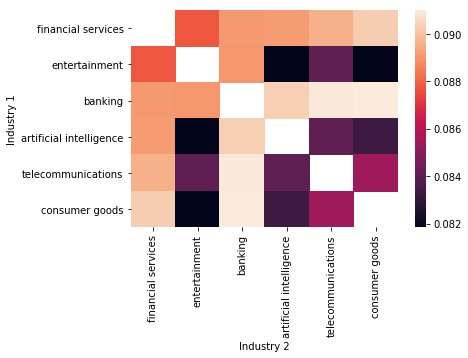

In [90]:
import seaborn as sns
import matplotlib.pyplot as plt
#Plot the heatmap
sns.heatmap(pivot_data)
plt.show()

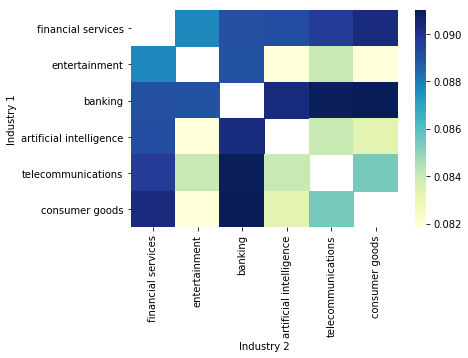

In [91]:
#Change the color
sns.heatmap(pivot_data, cmap='YlGnBu')
plt.show()

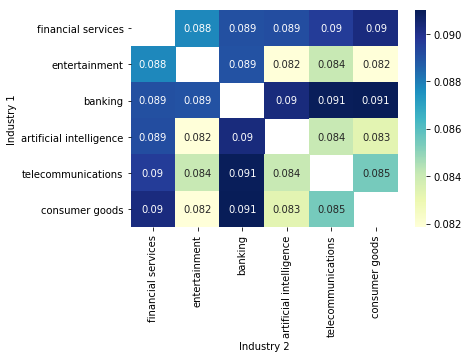

In [92]:
#Annotate
sns.heatmap(pivot_data, cmap='YlGnBu', annot=True)
plt.show()